# 集成学习

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

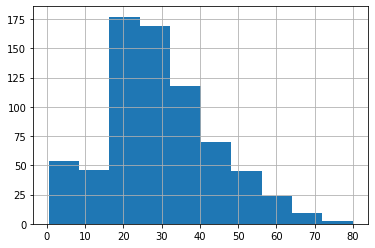

In [1]:
import pandas
import matplotlib.pyplot as plt

# 读取CSV格式的数据集
train = pandas.read_csv('data/titanic-train.csv')
test = pandas.read_csv('data/titanic-test.csv')

# 设置显示精度
pandas.set_option("display.precision", 2)

# 列出数据各列名字和类型
train.info()

# 描述整个数据集的数值变量分布
train.describe()
# 选择显示部分列的数值分布
train[['Age','Fare']].describe()
# 显示字符串类型的数据分布
train.describe(include=['O'])
# 绘制数值分布直方图
train['Age'].hist()

In [2]:
import numpy

def extract_input(df):
    # 将枚举值转化为独热(one-hot)的多列数值
    sex = df['Sex'].str.get_dummies().values
    embark = df['Embarked'].str.get_dummies().values
    # 用中位数填补确实的数值
    age = numpy.reshape(df['Age'].fillna(28).values, [-1, 1])
    fare = numpy.reshape(df['Fare'].fillna(14.45).values, [-1, 1])
    # 提取其他数据完整的数值类型
    other = df[['Pclass', 'SibSp', 'Parch']].values
    # 组织成训练数据
    x = numpy.concatenate((sex, age, fare, embark, other), axis=1)
    return x

X = extract_input(train)
Y = train['Survived'].values

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers = (
    ('随机森林', RandomForestClassifier(), 'test-result-rf.csv'),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100), 'test-result-adaboost.csv'),
    ('梯度提升算法', GradientBoostingClassifier(), 'test-result-gbt.csv'),
)

for (name, clf, result_name) in classifiers:
    clf.fit(X, Y)
    score = clf.score(X, Y)
    print('{0} 训练集准确度 {1:.3f}'.format(name, score))
    # 读取测试数据
    X_test = extract_input(test)
    # 进行预测
    Y_test = clf.predict(X_test)
    # 保存预测结果文件
    pid = test['PassengerId']
    result = pandas.DataFrame({'Survived': Y_test})
    result = pandas.concat([pid, result], axis=1)
    result.to_csv(result_name, index=False)

随机森林 训练集准确度 0.979
AdaBoost 训练集准确度 0.846
梯度提升算法 训练集准确度 0.897
